In [4]:
from chefboost import Chefboost as chef
import pandas as pd
from chefboost import Chefboost as chef
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
final=pd.read_excel('Data.xlsx')
final_1=final[['Decision','student_case','Department','CS2','CS3','IS2','IS3']]
from sklearn.model_selection import train_test_split
final_1_train, final_1_test = train_test_split( final_1, test_size = 0.3, random_state = 42,stratify=final_1["Decision"])
final_1

,Decision,student_case,Department,CS2,CS3,IS2,IS3
0,C,stay,Informayion_system,D,D,D,C
1,A,new,Computer_science,D,C,B,C
2,C,new,Informayion_system,D,D,D,D
3,C,new,Informayion_system,D,D,D,D
4,C,new,Informayion_system,D,D,D,D
...,...,...,...,...,...,...,...
169,A,new,Computer_science,A,B,C,A
170,A,new,Informayion_system,D,B,D,B
171,A,new,Computer_science,A,A,B,A
172,D,new,Computer_science,B,C,C,B


In [3]:
config={'algorithm':'CART'}
model=chef.fit(final_1_train,config)
chef.save_model(model,"modelCART.pkl")
evaluation=chef.evaluate(model,final_1_test,task="test")

config2={'algorithm':'C4.5'}
model2=chef.fit(final_1_train,config2)
chef.save_model(model,"modelc5.pkl")
evaluation2=chef.evaluate(model2,final_1_test,task="test")

config3={'algorithm':'CHAID'}
model3=chef.fit(final_1_train,config3)
chef.save_model(model,"modelchaid.pkl")
evaluation3=chef.evaluate(model3,final_1_test,task="test")



['student_case', 'Department', 'CS2', 'CS3', 'IS2', 'IS3', 'Decision']
[INFO]:  4 CPU cores will be allocated in parallel running
CART  tree is going to be built...
-------------------------
finished in  19.643339157104492  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  90.08264462809917 % on  121  instances
Labels:  ['A' 'B' 'D' 'C']
Confusion matrix:  [[34, 5, 0, 0], [1, 57, 2, 1], [0, 0, 1, 0], [0, 2, 1, 17]]
Decision  A  => Accuray:  95.0413 %, Precision:  87.1795 %, Recall:  97.1429 %, F1:  91.8919 %
Decision  B  => Accuray:  90.9091 %, Precision:  93.4426 %, Recall:  89.0625 %, F1:  91.2 %
Decision  D  => Accuray:  97.5207 %, Precision:  100.0 %, Recall:  25.0 %, F1:  40.0 %
Decision  C  => Accuray:  96.6942 %, Precision:  85.0 %, Recall:  94.4444 %, F1:  89.4737 %
['student_case', 'Department', 'CS2', 'CS3', 'IS2', 'IS3', 'Decision']
-------------------------
Evaluate  test set
-------------------------
Accuracy:  60.37735849056604 % o

C:\Users\remem\anaconda3\lib\site-packages\chefboost\commons\functions.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = predictions


-------------------------
finished in  6.414644479751587  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  90.08264462809917 % on  121  instances
Labels:  ['A' 'B' 'D' 'C']
Confusion matrix:  [[35, 6, 0, 0], [0, 57, 1, 3], [0, 1, 2, 0], [0, 0, 1, 15]]
Decision  A  => Accuray:  95.0413 %, Precision:  85.3659 %, Recall:  100.0 %, F1:  92.1053 %
Decision  B  => Accuray:  90.9091 %, Precision:  93.4426 %, Recall:  89.0625 %, F1:  91.2 %
Decision  D  => Accuray:  97.5207 %, Precision:  66.6667 %, Recall:  50.0 %, F1:  57.1429 %
Decision  C  => Accuray:  96.6942 %, Precision:  93.75 %, Recall:  83.3333 %, F1:  88.2353 %
['student_case', 'Department', 'CS2', 'CS3', 'IS2', 'IS3', 'Decision']
-------------------------
Evaluate  test set
-------------------------
Accuracy:  56.60377358490566 % on  53  instances
Labels:  ['B' 'A' 'C' 'D']
Confusion matrix:  [[18, 5, 6, 1], [5, 10, 0, 0], [5, 1, 2, 0], [0, 0, 0, 0]]
Decision  B  => Accuray:  58.4906 %, Pre

In [14]:
 prediction=chef.predict(model,['new','Computer_science','B','C','D','C'])
 prediction

'B'

In [14]:
fi = chef.feature_importance("outputs/rules/rules.py")

Decision rule:  outputs/rules/rules.py


In [21]:
  print(fi)

        feature  importance
4           IS2    1.639772
5           IS3    0.905719
1    Department    0.518696
2           CS2    0.418516
0  student_case    0.184463
3           CS3   -2.667167


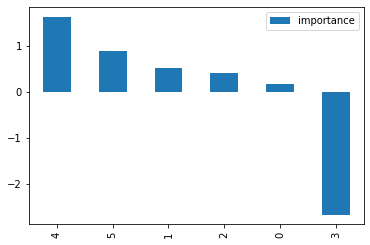

In [20]:
fi.plot.bar();plt.show()

In [17]:
import matplotlib.pyplot as plt 